In [1]:
##"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time

In [3]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.actions_available = [0, 1, 2, 3]
        self.max_timesteps = 250
        self.reward= 0
        self.agent_xc = 0
        self.agent_yc = 0
        self.deterministic = True

    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        pos = (self.agent_xc, self.agent_yc)
        self.goal_pos = [3, 3]
        self.wall1 = [0,1]
        self.wall2 = [0,3]
        self.wall3 = [2,2]
        self.wall4 = [3,0]
        self.state = np.zeros([4,4])
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5
        self.state[tuple(self.agent_pos)] = 1
        self.reward=0
        observation = self.state.flatten()
        return pos
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4: #check if agent is at the corner
            self.agent_pos[0] -= 1

        if action == 1:
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1

        if action == 2:
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1

        if action == 3:
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1

      


        state_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        npos = state_table[tuple(self.agent_pos)]
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.agent_pos)] = 1

        reward_table= np.array([[-1,-50,-1,-50],[-1,-1,-1,-1],[-1,-1,-50,-1],[-50,-1,-1,100]])
        reward= reward_table[tuple(self.agent_pos)]
        self.timestep += 1
        done = True if npos == 15 else False #terminal state reached
        info = {}
        return npos, reward, done, info
        
    def render(self):
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5
        self.state[tuple(self.agent_pos)] = 1
        plt.imshow(self.state)

    def stochastic(self, action):
        if action == 0 :
          return np.random.choice([0,1,2,3], p=[0.91, 0.03, 0.03, 0.03])

        elif action == 1 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.91, 0.03, 0.03])  

        elif action == 2 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.03, 0.91, 0.03])

        elif action == 3 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.03, 0.03, 0.91])

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

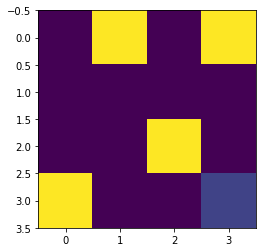

<IPython.core.display.Javascript object>

Model Ready! Training finished.

Total Episodes:  1000
Total Timesteps:  14224
Total Penalties:  11775
Average timesteps per episode: 14.224
Average penalties per episode: 11.775
SARSA Table:
 [[  4.7040514   -0.69699735 -49.58593252  -2.96970708]
 [  5.0068085  -55.40362199 -12.38100037  -7.04422289]
 [  6.7512548  -16.80547191 -64.05120087 -61.47026696]
 [ 17.7274721  -58.82599546 -58.86616863 -22.13183646]
 [  7.67189606   1.33637567   7.26104487   4.2874819 ]
 [  7.33689843 -55.39245777  13.37958092   0.11416148]
 [-28.33438633  -6.77161248  31.38370506  -0.87951011]
 [ 57.71037502 -51.34767361   8.06701502   7.70329268]
 [-33.62497661   3.68732724  19.42115423   7.92840269]
 [ 34.07635766   7.94521924 -20.87959209   7.86847507]
 [ 58.54259705   3.53425982  39.33631018   5.09360181]
 [ 99.99999997   9.30849081  40.79075041 -29.85844868]
 [-46.49739704  -7.18164993  33.50936609 -42.97975924]
 [ 32.91584391  16.52577623  55.94612779 -32.23464177]
 [ 57.93681413 -18.27680684 100.     

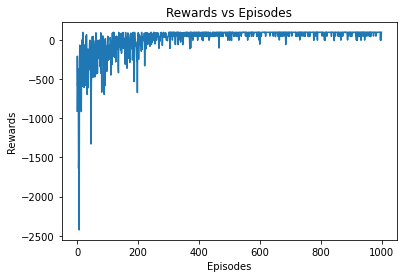

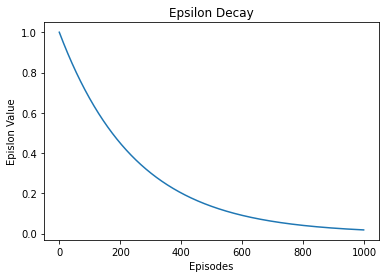

In [4]:
#SARSA Algorithm
from matplotlib import figure
env = GridEnvironment()
#Creating a Q_Table
q1_table = np.zeros([env.observation_space.n, env.action_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.6
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=1000
total_episodes = []
total_rewards = []
total_alpha=[]

total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    old_state = env.reset()
    old_action = choose_action(old_state)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        new_state, reward, done, info = env.step(old_action) 
        new_action = choose_action(new_state)  
        stochastic_action = env.stochastic(new_action)        
        #Learning the Q-value
        q1_table[old_state, old_action] = q1_table[old_state, old_action] + alpha * (reward + gamma * q1_table[new_state, new_action] - q1_table[old_state, old_action])  
        old_state = new_state
        old_action = stochastic_action
        if reward == -1:
            penalties += 1
        epochs += 1
        r += reward                                                              #accumulate rewards
        if(i > 998 ):                                                            #Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            env.render()
          time.sleep(1)        
    total_episodes.append(epochs)                                                #Timesteps for each Episode
    total_rewards.append(r)                                                      #Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-4*i/episodes)
    total_alpha.append(epsilon)  
plt.plot(total_rewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(total_alpha)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epislon Value')        

print("Model Ready! Training finished.\n")
print("Total Episodes: ",episodes)
print("Total Timesteps: ",total_epochs)
print("Total Penalties: ", total_penalties)
print("Average timesteps per episode:" ,total_epochs / episodes)
print("Average penalties per episode:", total_penalties / episodes)
print("SARSA Table:\n", q1_table)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15
Episode: 10


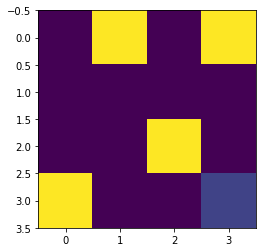

<IPython.core.display.Javascript object>

7
Test Done!

Total Episodes: 10
Total Timesteps: 81
Total Penalties: 67
Results after 10 episodes:
Average timesteps per episode:  8.1
Average penalties per episode:  6.7


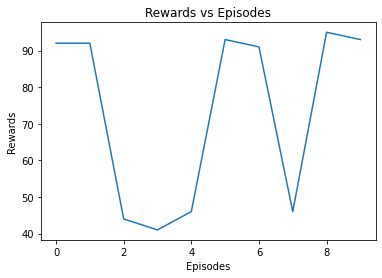

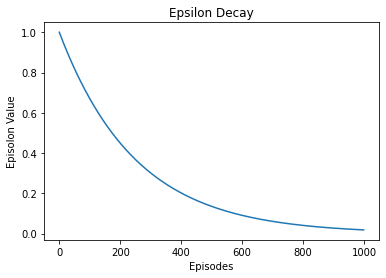

In [7]:
total_epochs, total_penalties = 0, 0
episodes = 10
totalTestRewards=[]
totalTestEpisopdes=[]

for abs in range(episodes):
    TestRewards=0
    state = env.reset()
    epochs, totalTestPenalties, reward = 0, 0, 0    
    done = False    
    while not done:
        action = np.argmax(q1_table[state])
        stochastic_action = env.stochastic(action)
        state, reward, done, info = env.step(stochastic_action)
        if reward == -1:
            totalTestPenalties += 1
        TestRewards += reward    
        epochs += 1
        if(abs > 8):                   #show last Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            print(state)
            print("Episode:", abs+1)
            env.render()  
          time.sleep(1)
    total_epochs += epochs
    total_penalties += totalTestPenalties
    totalTestEpisopdes.append(epochs) #Timesteps for each Episode
    totalTestRewards.append(TestRewards) #Rewards for each Episode    
plt.plot(totalTestRewards) 
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(total_alpha)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')         
print(totalTestPenalties)
print("Test Done!\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Results after", episodes, "episodes:")
print("Average timesteps per episode: ",total_epochs / episodes)
print("Average penalties per episode: ",total_penalties / episodes)